# Importing Important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import wordcloud
import nltk

In [2]:
data = pd.read_csv('Elon_musk.csv',encoding='latin1')

In [3]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# create copy of original data

In [4]:
df1 = pd.DataFrame(data['Text'])

In [5]:
df1

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


#  Clean Tweeter Comments

 **Remove all taging, Mention people, https from text**

In [6]:
def clean_tweet(Text):
    Text = re.sub('@[A-Za-z0–9_a-zA-Z0-9_a-zA-Z]+', ' ', Text)
    Text = re.sub('https?:\/\/\S+', ' ', Text)
    Text = re.sub('[^a-zA-z]',' ',Text)
    return Text
df1.Text = df1.Text.apply(clean_tweet)

In [7]:
df1

,Text
0,I m an alien
1,Ray tracing on Cyberpunk with HDR is next le...
2,Great interview
3,Doge is underestimated
4,Congratulations Tesla China for amazing exec...
...,...
1994,True it sounds so surreal but the negative...
1995,Make sure to read ur terms amp conditions ...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is U F U ...


In [8]:
pd.set_option('display.max_colwidth',-1)

<ipython-input-8-dc5dda32fe3d>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


In [9]:
df1.head()

,Text
0,I m an alien
1,Ray tracing on Cyberpunk with HDR is next level Have you tried it
2,Great interview
3,Doge is underestimated
4,Congratulations Tesla China for amazing execution last year Now on to the next for even more


In [10]:
afinn = pd.read_csv('Afinn.csv',encoding = 'latin1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [11]:
afinn = afinn.set_index('word')['value'].to_dict()

**Sentence Value Positive,Negative or Neutral using afinn_csv**

In [12]:
import spacy
nlt = spacy.load('en_core_web_sm')

In [14]:
def sentiment_value(Text :str = None):
    sent_score = 0
    if Text:
        sentence = nlt(Text)
        for word in sentence:
            sent_score += afinn.get(word.lemma_,0)
    return sent_score
df1['sent_value'] = df1['Text'].apply(sentiment_value)
    

In [15]:
df1

,Text,sent_value
0,I m an alien,0
1,Ray tracing on Cyberpunk with HDR is next level Have you tried it,0
2,Great interview,3
3,Doge is underestimated,-1
4,Congratulations Tesla China for amazing execution last year Now on to the next for even more,4
...,...,...
1994,True it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me,-3
1995,Make sure to read ur terms amp conditions before clicking accept,1
1996,Samwise Gamgee,0
1997,Altho Dumb and Dumber is U F U F,0


In [16]:
def sentiment(sent_value):
    result = ''
    if sent_value < 0:
        result = 'Negative'
    if sent_value == 0:
        result = 'Neutral'
    if sent_value > 0 :
        result = 'Positive'
    return result
df1['sentiment'] = df1.sent_value.apply(sentiment)
    

In [17]:
df1

,Text,sent_value,sentiment
0,I m an alien,0,Neutral
1,Ray tracing on Cyberpunk with HDR is next level Have you tried it,0,Neutral
2,Great interview,3,Positive
3,Doge is underestimated,-1,Negative
4,Congratulations Tesla China for amazing execution last year Now on to the next for even more,4,Positive
...,...,...,...
1994,True it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me,-3,Negative
1995,Make sure to read ur terms amp conditions before clicking accept,1,Positive
1996,Samwise Gamgee,0,Neutral
1997,Altho Dumb and Dumber is U F U F,0,Neutral


**Evaluation of Text using subjectivity and Polarity** 

In [18]:
!pip install textblob

In [19]:
from textblob import TextBlob

In [20]:
df2 =  pd.DataFrame(data['Text'])
def clean_tweet(Text):
    Text = re.sub('@[A-Za-z0–9_a-zA-Z0-9_a-zA-Z]+', ' ', Text)
    Text = re.sub('[^a-zA-z]',' ',Text)
    return Text
df2.Text = df2.Text.apply(clean_tweet)

In [21]:
df2

,Text
0,I m an alien
1,Ray tracing on Cyberpunk with HDR is next level Have you tried it
2,Great interview
3,Doge is underestimated
4,Congratulations Tesla China for amazing execution last year Now on to the next for even more
...,...
1994,True it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me https t co WJRzIbKh H
1995,Make sure to read ur terms amp conditions before clicking accept
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is U F U F


In [22]:
def sub_count(Text):
    return TextBlob(Text).sentiment.subjectivity
def pol_count(Text):
    return TextBlob(Text).sentiment.polarity
df2['subjectivity'] = df2.Text.apply(sub_count)
df2['polarity'] = df2.Text.apply(pol_count)

In [23]:
df2

,Text,subjectivity,polarity
0,I m an alien,0.750000,-0.250000
1,Ray tracing on Cyberpunk with HDR is next level Have you tried it,0.000000,0.000000
2,Great interview,0.750000,0.800000
3,Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execution last year Now on to the next for even more,0.366667,0.275000
...,...,...,...
1994,True it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me https t co WJRzIbKh H,0.508333,0.111111
1995,Make sure to read ur terms amp conditions before clicking accept,0.888889,0.500000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb and Dumber is U F U F,0.500000,-0.375000


In [24]:
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    if polarity == 0:
        result = 'Neutral'
    if polarity > 0 :
        result = 'Positive'
    return result
df2['sentiment'] = df2.polarity.apply(sentiment)

In [25]:
df2

,Text,subjectivity,polarity,sentiment
0,I m an alien,0.750000,-0.250000,Negative
1,Ray tracing on Cyberpunk with HDR is next level Have you tried it,0.000000,0.000000,Neutral
2,Great interview,0.750000,0.800000,Positive
3,Doge is underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China for amazing execution last year Now on to the next for even more,0.366667,0.275000,Positive
...,...,...,...,...
1994,True it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me https t co WJRzIbKh H,0.508333,0.111111,Positive
1995,Make sure to read ur terms amp conditions before clicking accept,0.888889,0.500000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb and Dumber is U F U F,0.500000,-0.375000,Negative


#  Vidualization of  Negative, Positive and Neutral sentence in Tweet

 **Using Afinn_csv**

<AxesSubplot:>

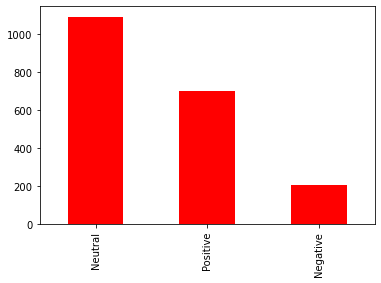

In [26]:
df1.sentiment.value_counts().plot(kind = 'bar',color ='Red')

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1999 non-null   object
 1   sent_value  1999 non-null   int64 
 2   sentiment   1999 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


**Using textblob**

<AxesSubplot:>

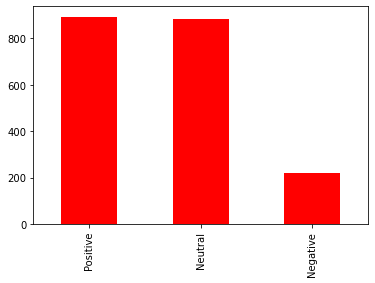

In [28]:
df2.sentiment.value_counts().plot(kind = 'bar',color = 'Red')

**Histogram of sentiment counts in Tweet**

C:\Users\Solan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sent_value', ylabel='Density'>

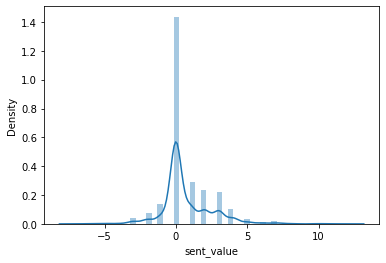

In [29]:
import seaborn as sns
sns.distplot(df1['sent_value'])

1) Most of sentence are Nuetral as per tafinn_csv                                                                                 
2) Histogram looks quite symetric in nature means there are positive and also negative Tweets        

#  WordCloud

In [30]:
df2 =[Text.strip() for Text in df1.Text]   # remove the both leading and the trainig charecter
df2

['I m an alien',
 'Ray tracing on Cyberpunk with HDR is next level  Have you tried it',
 'Great interview',
 'Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year  Now on to the next for even more',
 'Happy New Year of the Ox',
 'Frodo was the underdoge  All thought he would fail  Himself most of all',
 'Haha thanks',
 'Indeed  Tweets definitely do not represent real world time allocation',
 'The most entertaining outcome is the most likely',
 'Just sent some',
 'Just agree to do Clubhouse with',
 '',
 'It s getting real',
 'Bought some Dogecoin for lil X  so he can be a toddler hodler',
 'He definitely has issues  but the sentencing seems a bit high',
 'Thanks for fixing',
 'Please unlock my account',
 'U     F     U     F',
 'This is true power haha',
 'Any crypto wallet that won t give you your private keys should be avoided at all costs',
 'Your app sucks',
 'RT    NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway

In [31]:
join_df2=' '.join(df2)
join_df2

'I m an alien Ray tracing on Cyberpunk with HDR is next level  Have you tried it Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more Happy New Year of the Ox Frodo was the underdoge  All thought he would fail  Himself most of all Haha thanks Indeed  Tweets definitely do not represent real world time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U     F     U     F This is true power haha Any crypto wallet that won t give you your private keys should be avoided at all costs Your app sucks RT    NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission Yes Once we can predict cash flow reasonably well  Starlink will

In [32]:
# Remove Punctuations 
import string
no_punc_text=join_df2.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I m an alien Ray tracing on Cyberpunk with HDR is next level  Have you tried it Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more Happy New Year of the Ox Frodo was the underdoge  All thought he would fail  Himself most of all Haha thanks Indeed  Tweets definitely do not represent real world time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U     F     U     F This is true power haha Any crypto wallet that won t give you your private keys should be avoided at all costs Your app sucks RT    NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission Yes Once we can predict cash flow reasonably well  Starlink will

In [33]:
# stopword

import nltk
from nltk.corpus import stopwords

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Solan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
# Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(join_df2)
print(text_tokens[0:50])
len(text_tokens)

['I', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next', 'level', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought']


17858

In [35]:
# Remove stopword 
import nltk
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U','F','C','b']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next', 'level', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'real', 'world', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cas

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Solan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Normalize the data
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words[0:25])

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next', 'level', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new']


In [37]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['one', 'mission', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'amp', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'amp', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', 'm', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'miss', 'back', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', 'wow', 'orbit', 'launch', 'tower', 'stack', 'enough', 'raptor']


In [38]:
# join the data agin for Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr next level have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent real world time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical amp economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes amp shipping this inten

In [39]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'next', 'level', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'real', 'world', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonably', 'we

In [40]:
clean_tweets=' '.join(lemmas)
clean_tweets

'alien ray trace cyberpunk hdr next level have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent real world time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical amp economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis amp ship this intend earth may idea apply mars xprize team m

In [41]:
# feature extraction 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(lemmas)
x

<11255x3176 sparse matrix of type '<class 'numpy.int64'>'
	with 11004 stored elements in Compressed Sparse Row format>

In [42]:
print(vectorizer.get_feature_names()[40:90])

['active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'af', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'all']


In [43]:
print(vectorizer.vocabulary_)

{'alien': 87, 'ray': 2226, 'trace': 2878, 'cyberpunk': 656, 'hdr': 1246, 'next': 1836, 'level': 1565, 'have': 1241, 'try': 2906, 'great': 1197, 'interview': 1442, 'doge': 781, 'underestimate': 2946, 'congratulation': 564, 'tesla': 2787, 'china': 472, 'amazing': 110, 'execution': 949, 'last': 1529, 'year': 3157, 'now': 1865, 'even': 922, 'happy': 1228, 'new': 1834, 'ox': 1966, 'frodo': 1099, 'underdoge': 2945, 'all': 89, 'thought': 2823, 'would': 3143, 'fail': 983, 'himself': 1286, 'haha': 1218, 'thank': 2796, 'indeed': 1382, 'tweet': 2918, 'definitely': 694, 'represent': 2293, 'real': 2237, 'world': 3139, 'time': 2838, 'allocation': 91, 'the': 2801, 'entertaining': 892, 'outcome': 1945, 'likely': 1582, 'just': 1485, 'send': 2435, 'agree': 72, 'clubhouse': 501, 'it': 1462, 'get': 1155, 'buy': 393, 'dogecoin': 783, 'lil': 1583, 'toddler': 2849, 'hodler': 1292, 'he': 1247, 'issue': 1461, 'sentencing': 2441, 'seem': 2429, 'bit': 310, 'high': 1281, 'fix': 1047, 'please': 2063, 'unlock': 297

In [44]:
print(x.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
print(x.toarray().shape)

(11255, 3176)


In [46]:
from wordcloud import WordCloud, STOPWORDS

In [47]:
def plot_cloud(wordcloud):
    # set fig size
    plt.figure(figsize = (40,30))
    # display image
    plt.imshow(wordcloud)
    # no axis details
    plt.axis('off');

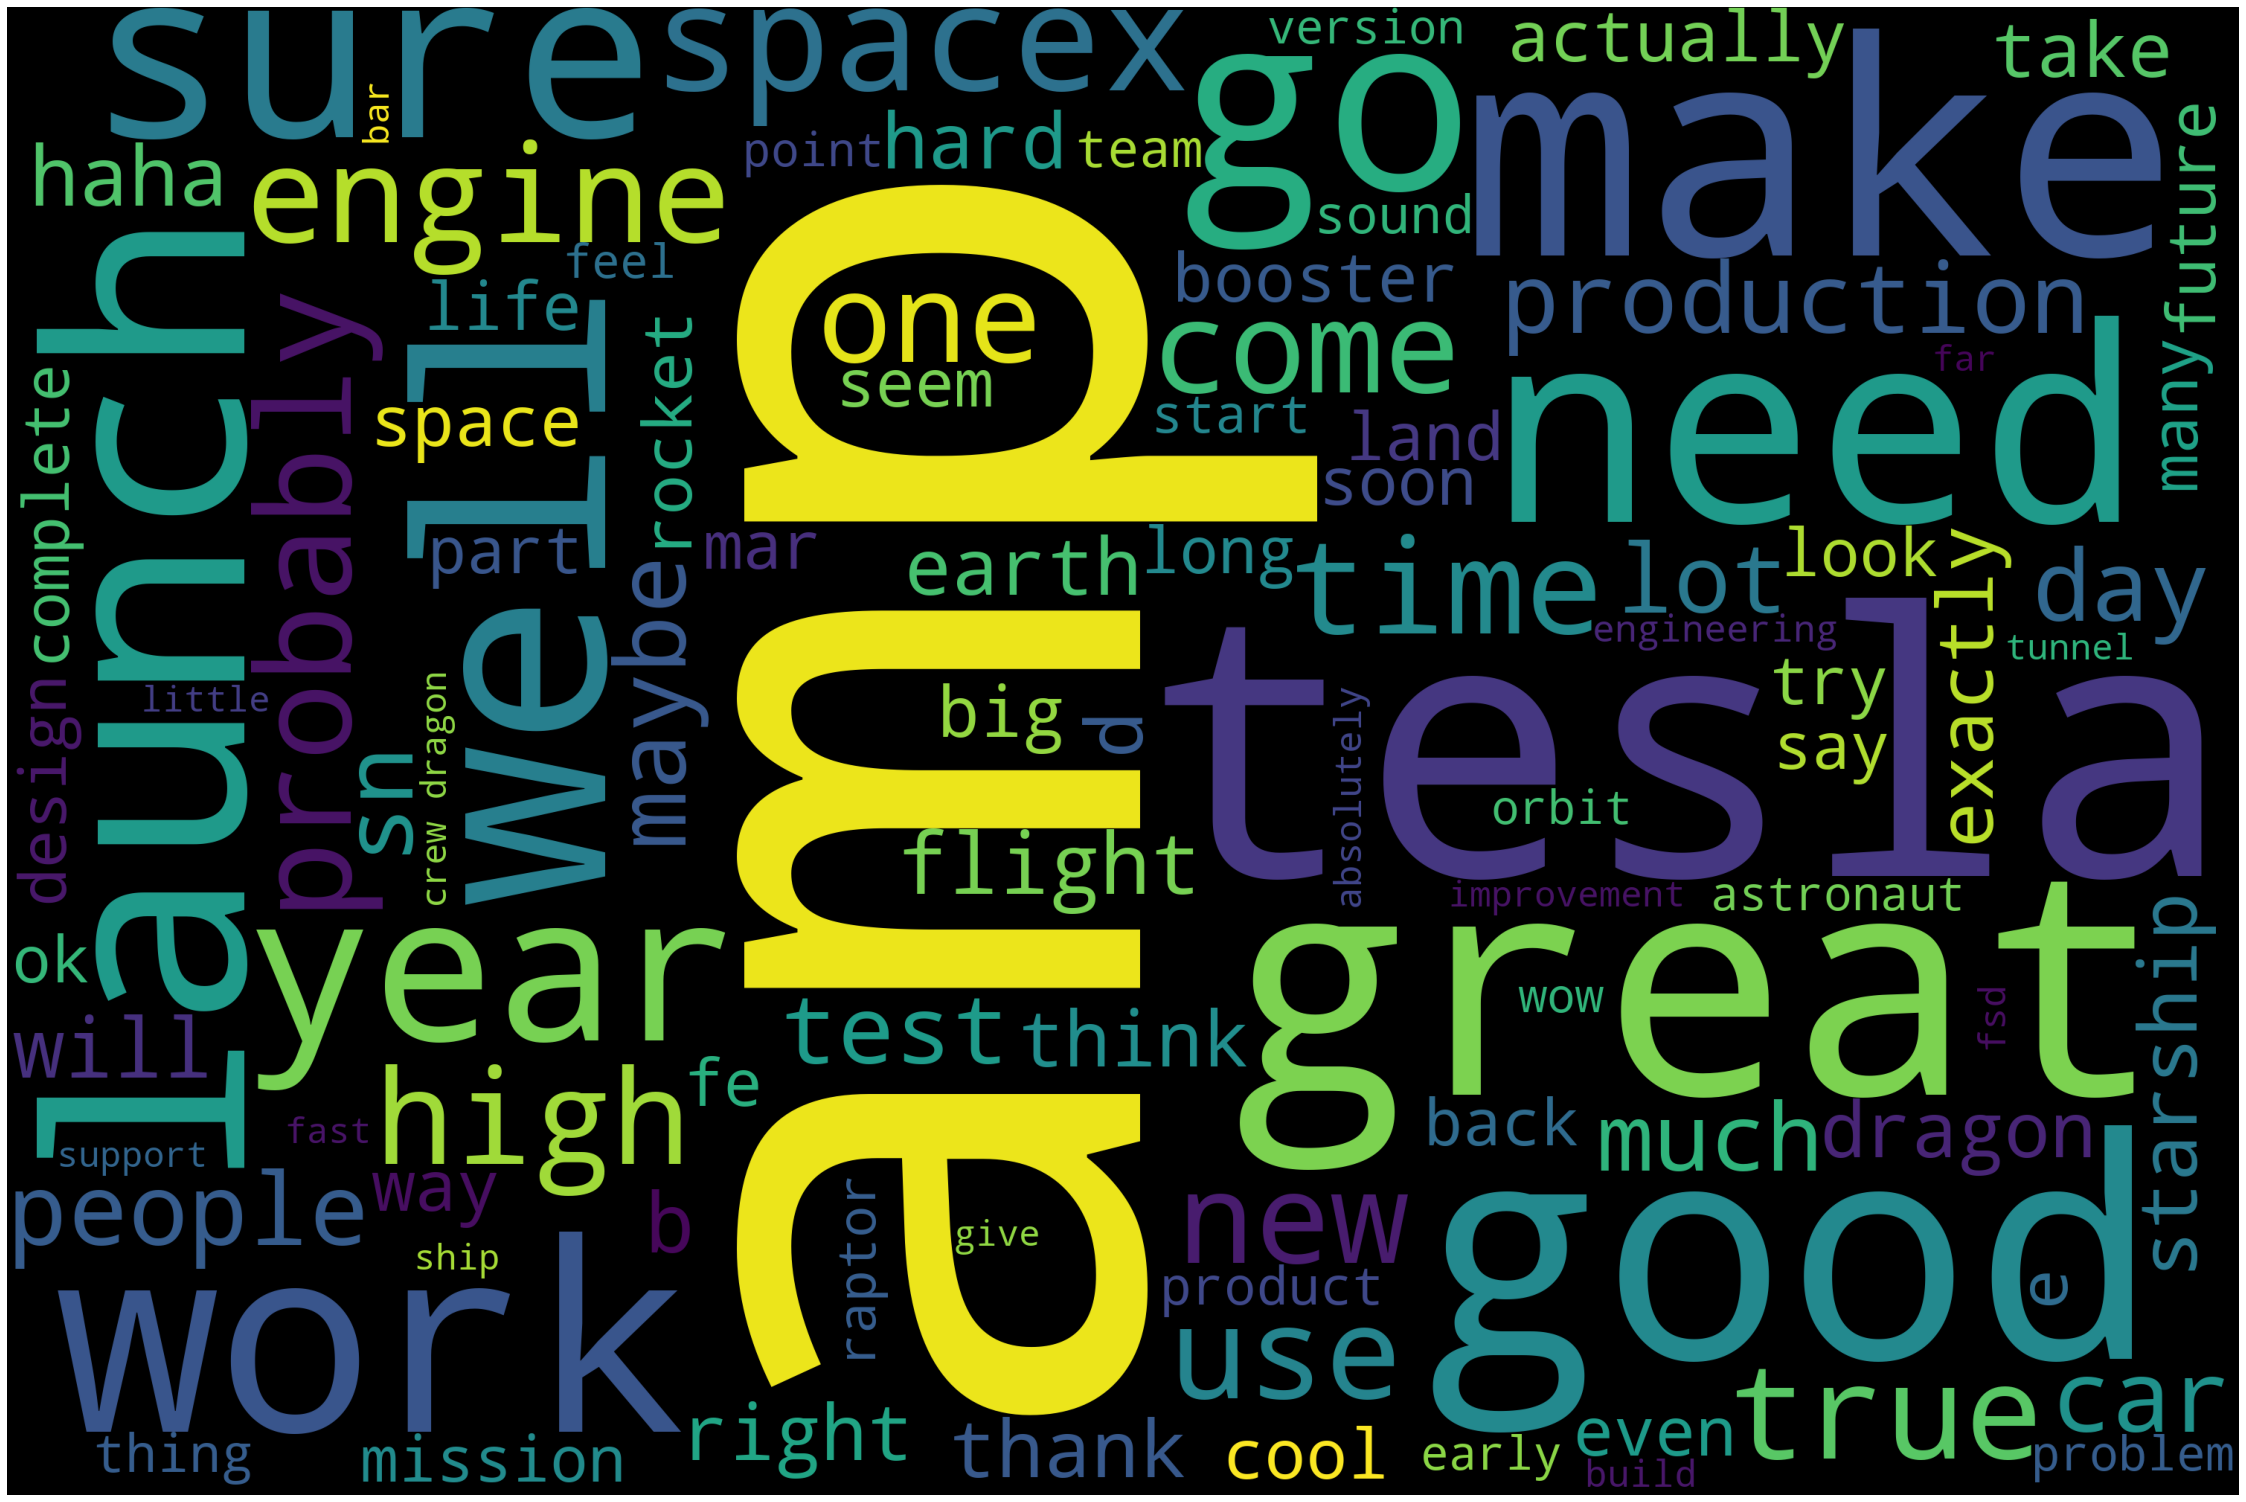

In [48]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color ='black', max_words = 100,stopwords=stopwords).generate(clean_tweets)
plot_cloud(wordcloud)